<a href="https://colab.research.google.com/github/shkimusw/bigdata/blob/main/%5B11%EC%A3%BC%EC%B0%A8_%EA%B0%95%EC%9D%98%5D_%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **머신러닝을 위한 준비**

한 아마추어 식물학자가 들에서 발견한 붓꽃(iris)의 품종을 알고 싶어한다. 이 식물학자는 붓꽃의 꽃잎(petal)과 꽃받침(sepal)의 폭과 길이를 센티미터 단위로 측정하였다.



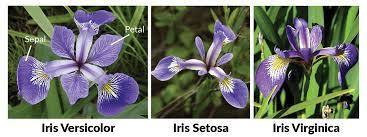

또 전문 식물학자가 setosa, versicolor, virginica 종으로 분류한 붓꽃의 측정 데이터도 가지고 있다. 이 측정값을 이용해서 앞에서 채집한 붓꽃이 어떤 품종인지 구분하려 한다. 이 아마추어 식물학자가 야생에서 채집한 붓꽃은 이 세 종류뿐이라고 가정하자.

우리의 목표는 어떤 품종인지 구분해놓은 측정 데이터를 이용해 새로 채집한 붓꽃의 품종을 예측하는 머신러닝 모델을 만드는 것이다.

# 데이터셋 불러오기

In [1]:
# 라이브러리 환경
import pandas as pd
import numpy as np

In [2]:
# sklearn 데이터셋에서 iris 데이터셋 로딩
from sklearn import datasets
iris = datasets.load_iris()

# iris 데이터셋은 딕셔너리 형태이므로, key 값을 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# DESCR 키를 이용하여 데이터셋 설명(Description) 출력
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print("특성의 이름: \n{}".format(iris['feature_names']))

특성의 이름: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print("타깃의 이름: {}".format(iris['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [6]:
# target 배열은 샘플 붓꽃의 품종을 담은 NumPy 배열이다.
# target 속성의 데이터셋 크기
print("데이터셋 크기:", iris['target'].shape)

# target 속성의 데이터셋 내용
print("데이터셋 내용: \n", iris['target'])

데이터셋 크기: (150,)
데이터셋 내용: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# data는 꽃잎의 길이와 폭, 꽃받침의 길이와 폭을 수치 값으로 가지고 있는 NumPy 배열이다.
# data 속성의 데이터셋 크기
print("데이터셋 크기:", iris['data'].shape)
# data 속성의 데이터셋 내용 (첫 7개 행을 추출)
print("데이터셋 내용: \n", iris['data'][:7, :])

데이터셋 크기: (150, 4)
데이터셋 내용: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


In [8]:
# data 속성을 판다스 데이터프레임으로 변환
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("데이터프레임의 형태:", df.shape)
df.head()

데이터프레임의 형태: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# 열(column) 이름을 간결하게 변경
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [10]:
# Target 열 추가
df['Target'] = iris['target']
print('데이터셋의 크기: ', df.shape)
df.head()

데이터셋의 크기:  (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 데이터 탐색

In [11]:
# 데이터프레임의 기본정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
# 통계정보 요약
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
# 결측값 확인
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

In [14]:
# 중복 데이터 확인
df.duplicated().sum()

1

In [15]:
# 중복 데이터 출력
df.loc[df.duplicated(), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
142,5.8,2.7,5.1,1.9,2


In [16]:
# 중복 데이터 모두 출력
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [17]:
# 중복 데이터 제거
df = df.drop_duplicates()
# 삭제되었는지 확인
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2


In [18]:
# 변수 간의 상관관계 분석
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


In [19]:
# 시각화 라이브러리 설정
import matplotlib.pyplot as plt
# seaborn 라이브러리를 사용해보자.
import seaborn as sns
sns.set(font_scale=1.2)

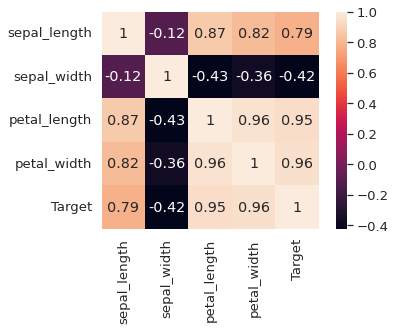

In [20]:
# 상관계수 히트맵
sns.heatmap(data=df.corr(), square=True, annot=True)
plt.show()

In [21]:
# Target 값의 분포 - value_counts 함수
df['Target'].value_counts()

0    50
1    50
2    49
Name: Target, dtype: int64

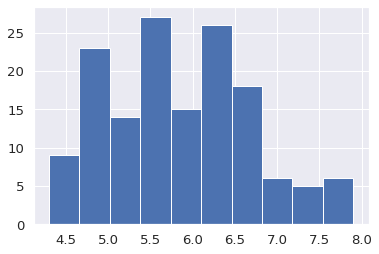

In [22]:
# sepal_length 값의 분포 - hist 함수
plt.hist(x='sepal_length', data=df)
plt.show()

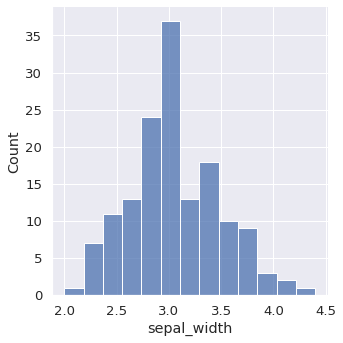

In [23]:
# sepal_width 값의 분포 - displot 함수 (histogram)
sns.displot(x='sepal_width', kind='hist', data=df)
plt.show()

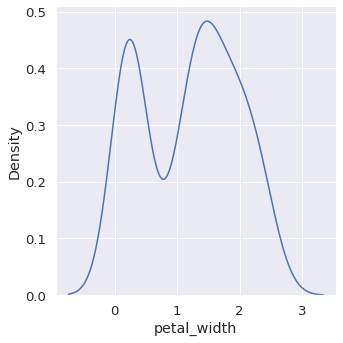

In [24]:
# petal_length 값의 분포 - displot 함수 (kde 밀도 함수 그래프)
sns.displot(x='petal_width', kind='kde', data=df)
plt.show()

# 봉우리가 두 개인 것으로 보아 서로 이질적인 데이터가 섞여있음을 추정해볼 수 있다.

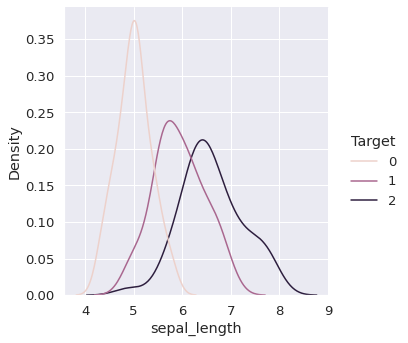

In [25]:
# 품종별 sepal_length 값의 분포 비교
sns.displot( x='sepal_length', hue='Target', kind='kde', data=df)
plt.show()

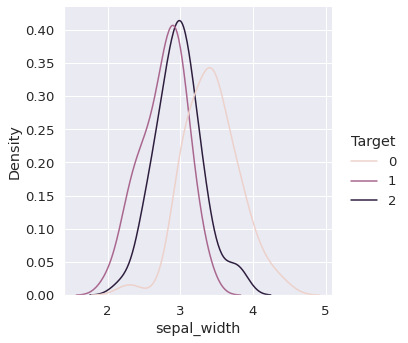

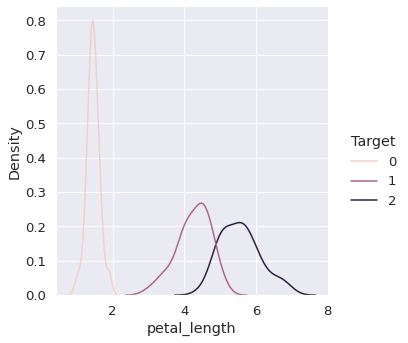

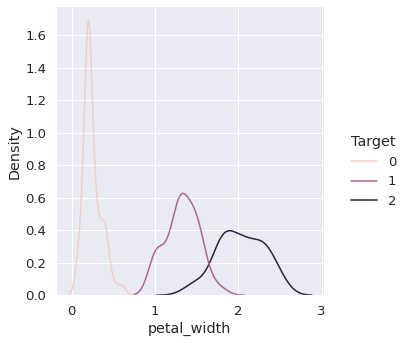

In [26]:
# 나머지 3개 피처 데이터를 한번에 그래프로 출력
for col in ['sepal_width', 'petal_length', 'petal_width']:
    sns.displot(x=col, hue='Target', kind='kde', data=df)
plt.show()

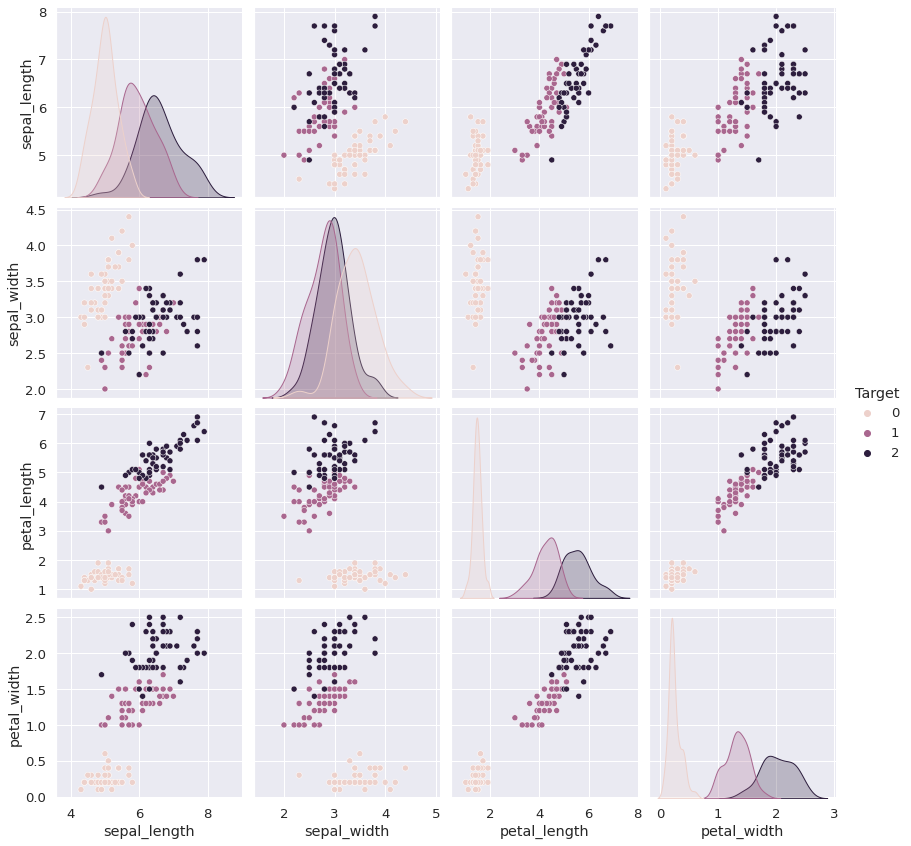

In [27]:
# 두 변수 간의 관계
sns.pairplot(df, hue = 'Target', height = 3, diag_kind = 'kde')  # 히스토그램으로 보고 싶으면 'hist'로 설정
plt.show()


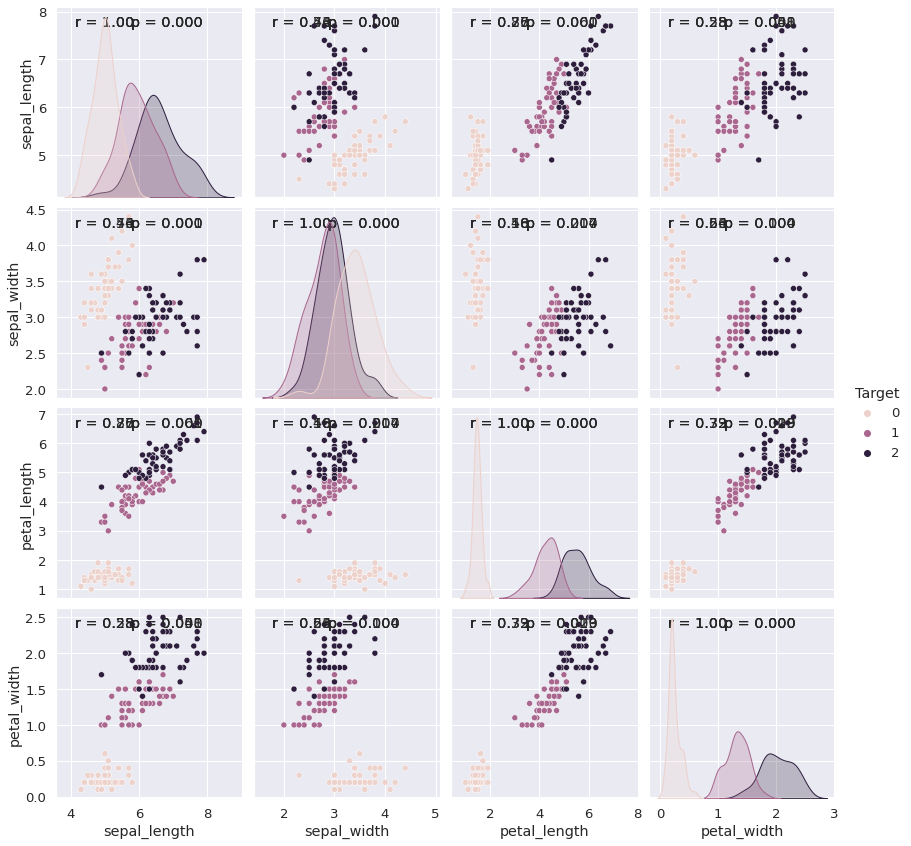

In [28]:
# 상관계수 나오는 그래프로 그리기
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

df = sns.load_dataset("iris")
df['Target'] = iris['target']
#df = df[df["species"] == "setosa"]   # 3종이 섞인 상관계수보다 각 종의 상관계수를 구하는 것이 데이터구조상 적합함
graph = sns.pairplot(df, hue = 'Target', height = 3, diag_kind = 'kde')
graph.map(corrfunc)
plt.show()